In [1]:
import pandas as pd
import filecmp
import os


In [2]:
screens = [
    'Human_InVitro_294T_Apobec_D14_Input.txt',
    'Human_InVitro_294T_TadA_D14_Input.txt',
    'Human_InVitro_SK-ES_Apobec_D14_Input.txt',
    'Human_InVitro_SK-ES_TadA_D17_Input.txt',
    'Human_InVitro_SW480_Apobec_D14_Input.txt',
    'Human_InVitro_SW480_TadA_D14_Input.txt',
    ]
workdir = '../tests/results'
input_gene = 'SETDB1'
input_uniprot = 'Q15047'
structureid = f"AF-{input_uniprot}-F1-model_v4"

## af_structural_features.py (1)

In [3]:
# ! pip install DSSPparser
# ! pip install wget

In [4]:
# this is a requisite step to prioritizing by conservation
from af_structural_features import af_structural_features

In [5]:
af_structural_features(
    workdir=workdir, 
    input_gene=input_gene, 
    input_uniprot=input_uniprot, 
    structureid=structureid
    )

,unipos,unires,x_coord,y_coord,z_coord,bfactor_pLDDT,Naa_count,Naa,Naa_pos,SS9,...,ACC,RSA,exposure,PHI,normPHI,PSI,normPSI,dBurial,normSumdBurial,pLDDT_dis
0,1,M,40.740,39.109,-6.115,36.75,1,S,2,L,...,233,1.04,exposed,360.0,2.00,157.3,0.87,0.00,0.000,very low
1,2,S,37.812,38.895,-3.704,32.83,2,M;S,1;3,L,...,103,0.66,medexposed,35.4,0.20,133.7,0.74,0.38,0.076,very low
2,3,S,35.498,37.485,-2.174,32.79,2,S;L,2;4,L,...,99,0.64,medexposed,179.7,1.00,177.6,0.99,0.40,0.120,very low
3,4,L,32.875,36.126,0.319,42.90,2,S;P,3;5,L,...,165,0.82,exposed,94.0,0.52,156.7,0.87,0.22,0.079,very low
4,5,P,31.112,32.952,1.735,39.74,2,L;G,4;6,L,...,115,0.72,medexposed,-102.6,-0.57,165.8,0.92,0.32,0.090,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,3.341,-6.712,-10.508,85.91,3,C;G;R,1286;1288;1289,L,...,104,0.42,medburied,-63.4,-0.35,-9.9,-0.06,0.62,0.552,confident
1287,1288,G,5.709,-4.495,-12.671,86.20,6,E;D;C;C;R;R,1146;1147;1279;1286;1287;1289,S,...,9,0.09,buried,71.4,0.40,-39.9,-0.22,0.95,0.798,confident
1288,1289,R,2.800,-4.128,-15.192,86.79,7,L;L;C;R;G;L;L,1277;1278;1279;1287;1288;1290;1291,B,...,69,0.28,medburied,-126.4,-0.70,162.4,0.90,0.76,0.616,confident
1289,1290,L,-0.974,-3.633,-15.073,80.70,7,Y;V;L;L;C;R;L,1267;1269;1277;1278;1279;1289;1291,L,...,11,0.05,buried,-104.3,-0.58,-44.6,-0.25,0.99,0.733,confident


In [7]:
# path1 = '../tests/results/SETDB1/AF_Q15047.pdb',                           '../tests/reference/SETDB1/AF_Q15047.pdb'
# path2 = '../tests/results/SETDB1/AF-Q15047-F1-model_v4_coord_struc_features.tsv', '../tests/reference/SETDB1/AF-Q15047-F1-model_v4_coord_struc_features.tsv'
# path3 = '../tests/results/SETDB1/AF-Q15047-F1-model_v4_dssp_parsed.tsv',          '../tests/reference/SETDB1/AF-Q15047-F1-model_v4_dssp_parsed.tsv'
# path4 = '../tests/results/SETDB1/AF-Q15047-F1-model_v4_processed.pdb',            '../tests/reference/SETDB1/AF-Q15047-F1-model_v4_processed.pdb'
# path5 = '../tests/results/SETDB1/Q15047.fasta',                                   '../tests/reference/SETDB1/Q15047.fasta'
# path6 = '../tests/results/SETDB1/SETDB1_Q15047.tsv',                              '../tests/reference/SETDB1/SETDB1_Q15047.tsv'
# paths = [path1, path2, path3, path4, path5, path6]

# for path in paths: 
#     if os.path.exists(path[0]) and os.path.exists(path[1]): 
#         if not filecmp.cmp(path[0], path[1]):
#             print(path[0], path[1])
#         else: 
#             print('Passed comparsion!')
#     else: print('File DNE')

# import difflib

# for path in paths[1:3]: 
#     with open(path[0]) as f1, open(path[1]) as f2:
#         diff = difflib.unified_diff(f1.readlines(), f2.readlines(), fromfile=path[0], tofile=path[1])
#         for line in diff:
#             print(line, end='')


## preprocess_be_results.py (3.1)

In [8]:
from preprocess_be_results import parse_base_editing_results

Human_InVitro_294T_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5203.0 0.27775308830665546
Nonsense vs No mutation: 2506.0 0.2608706384740007
Nonsense vs Silent: 1803.0 0.24557416370880203
No mutation vs Silent: 10178.0 0.9214706032590196

Human_InVitro_294T_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 8506.0 0.8707578845218364


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:226: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)



Human_InVitro_SK-ES_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5573.0 0.6324443593517178
Nonsense vs No mutation: 2678.0 0.5679899176749412
Nonsense vs Silent: 1925.0 0.5238232060741514
No mutation vs Silent: 10262.0 0.9847223016764184

Human_InVitro_SK-ES_TadA_D17_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7643.0 0.11881211072193099


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:226: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)



Human_InVitro_SW480_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 2427.0 1.6984223621187785e-08
Nonsense vs No mutation: 1191.0 8.57141567900219e-08
Nonsense vs Silent: 746.0 1.208578432773731e-08
No mutation vs Silent: 10293.0 0.949670567871975

Human_InVitro_SW480_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7227.0 0.025534008934151198


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:226: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)


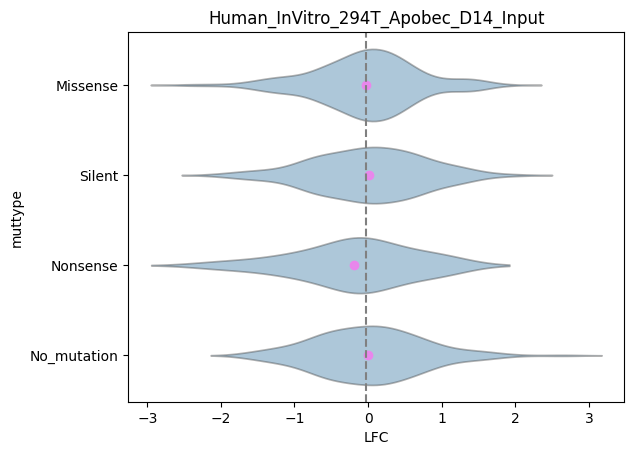

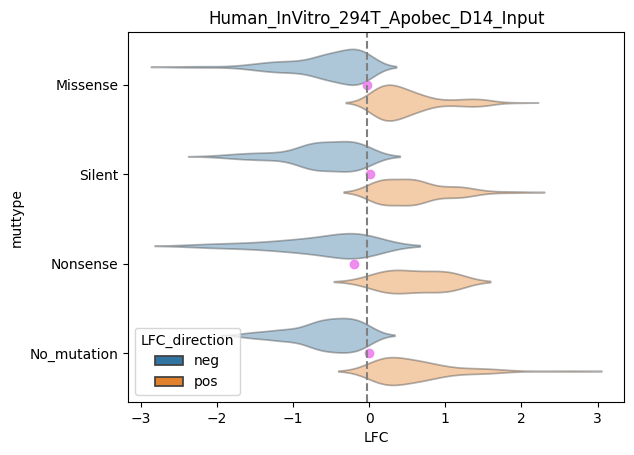

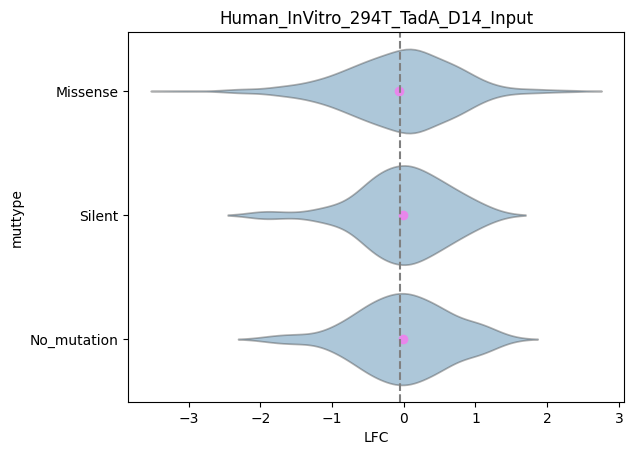

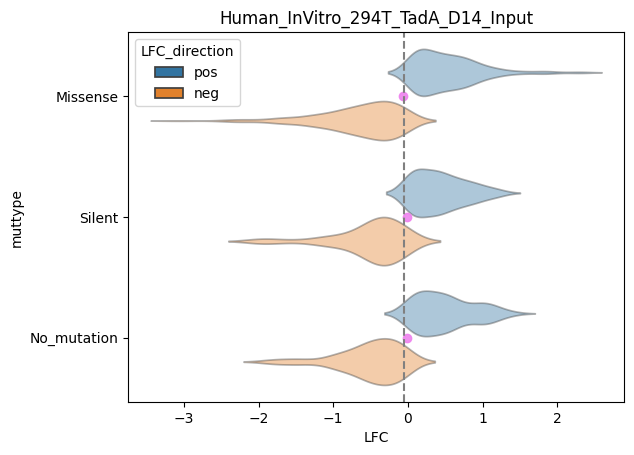

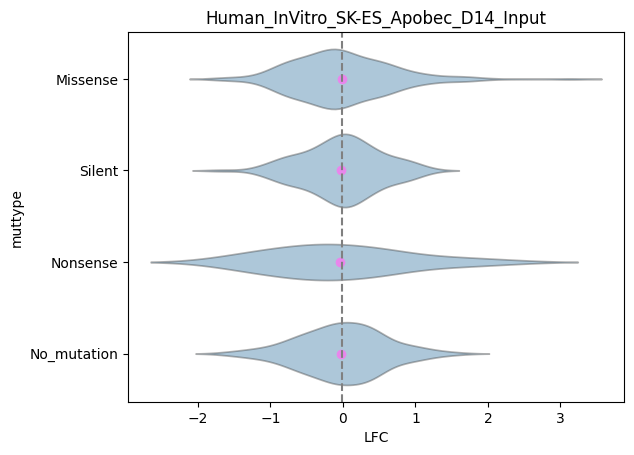

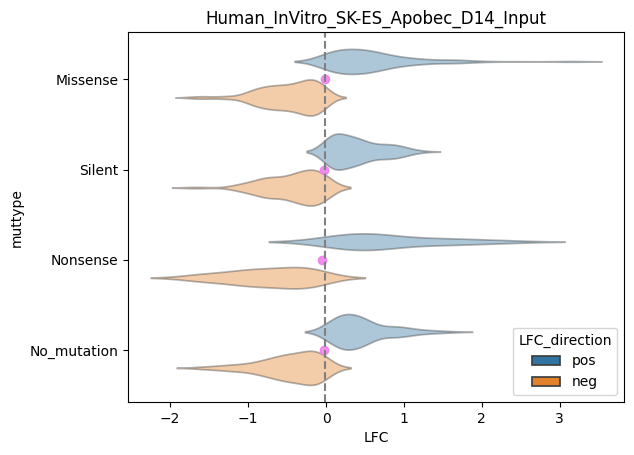

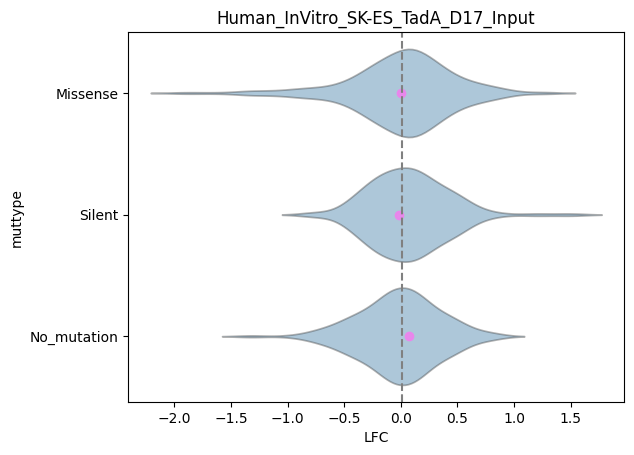

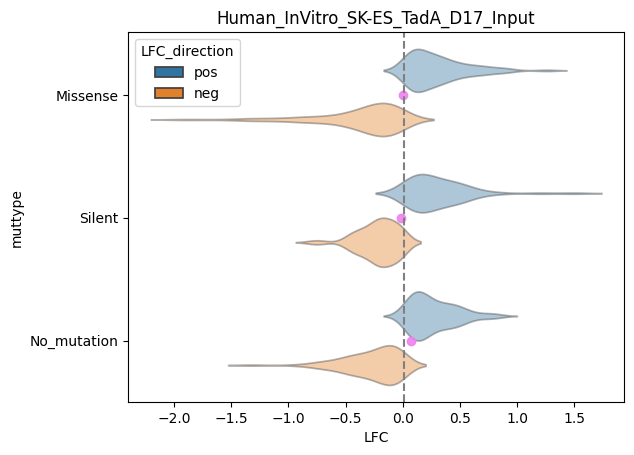

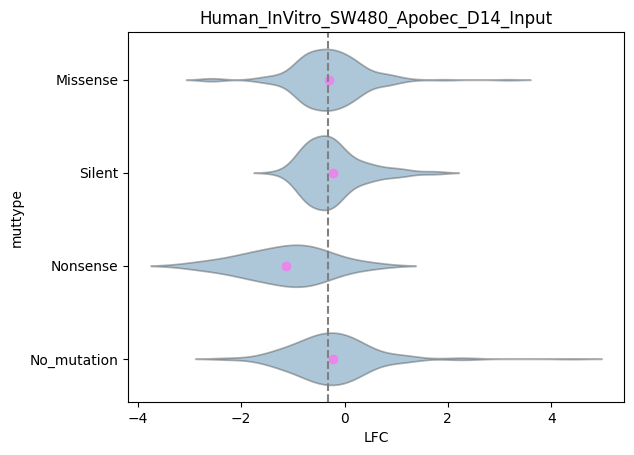

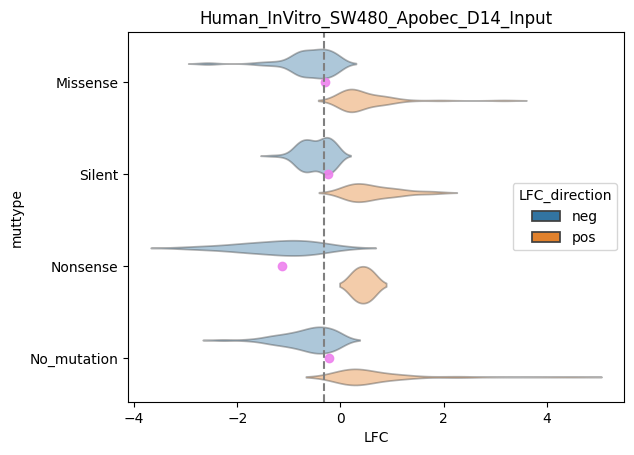

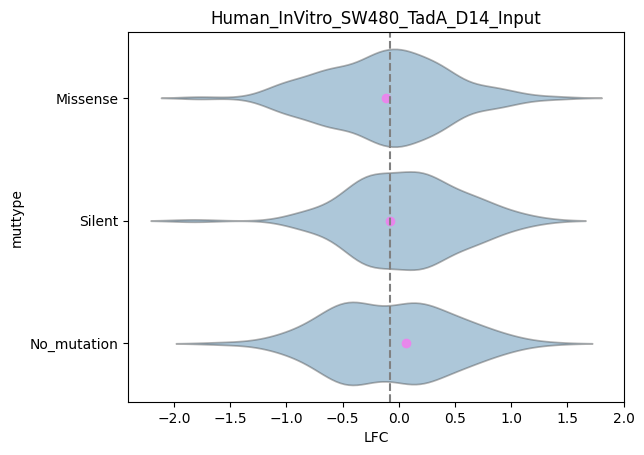

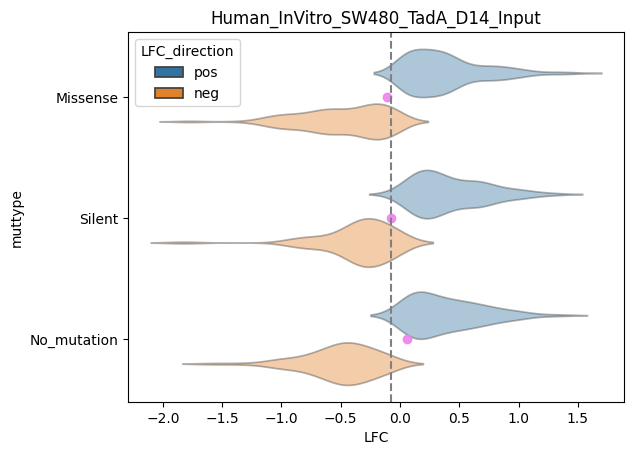

In [10]:
vals = ['D14_Input', 'D14_Input', 'D14_Input', 'D17_Input', 'D14_Input', 'D14_Input', ]

for screen, val in zip(screens, vals): 
    print(screen)
    df = pd.read_csv(workdir + '/../rawdata/' + screen, sep='\t')
    parse_base_editing_results(df_InputGene = df, 
                               workdir      = workdir, 
                               input_gene   = input_gene, 
                               input_screen = screen, 
                               mut_col='Histogram_Category', val_col=val, 
                               gene_col='TargetGeneSymbol', edits_col='AminoAcidEdits',
                               )
    print()

In [5]:
# check output with previous output
for f in os.listdir('../tests/SETDB1/screendata'): 
    path1 = '../tests/SETDB1/screendata/'+f
    path2 = '../tests/SETDB1/SETDB1/screendata/'+f
    if os.path.exists(path1) and os.path.exists(path2): 
        if not filecmp.cmp(path1, path2):
            print(f)
    else: 
        print('A file doesnt exist', path1)

A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_294T_Apobec_D14_Input_No_Mutation_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SW480_TadA_D14_Input_No_Mutation_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_Splice_Site_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_Silent_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SW480_Apobec_D14_Input_No_Mutation_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_294T_TadA_D14_Input_No_Mutation_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_No_Mutation_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SW480_Apobec_D14_Input_Nonsense_edits_list.tsv
A file doesnt exist ../tests/SETDB1/screendata/SETDB1_Human_InVitro_SW480_

## randomize_preprocessed_be_results.py (3.1.5)

In [12]:
from randomize_be_results import randomize_be_results

In [13]:
# this cell would take 2x time with original code

for screen in screens: 
    print(screen)
    screen = screen.split('.')[0]
    df = pd.read_csv(workdir + '/SETDB1/screendata/' + input_gene + '_' + screen + '_Missense_edits_list.tsv', sep='\t')
    randomize_be_results(df_missense=df, 
                         workdir=workdir, 
                         input_gene=input_gene, 
                         input_screen=screen)


Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## conservation.py (2)

In [3]:
from conservation import conservation

In [4]:
df_alignconserv, df_residuemap = conservation(workdir, 
                                              input_human_gene=input_gene, input_mouse_gene='Setdb1', 
                                              input_human_uniid=input_uniprot, input_mouse_uniid='D3YYC3', # O88974
                                              email='xiaohu@g.harvard.edu', title='samplejob', 
                                              )
# block takes ~1 min due to calls to MUSCLE

Job ID: muscle-R20240801-054406-0673-32561686-p1m


In [15]:
# path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
# path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
# if os.path.exists(path1) and os.path.exists(path2): 
#     if not filecmp.cmp(path1, path2):
#         print(path1, path2)
#     else: 
#         print('Passed comparsion!')

# path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
# path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
# if os.path.exists(path1) and os.path.exists(path2): 
#     if not filecmp.cmp(path1, path2):
#         print(path1, path2)
#     else: 
#         print('Passed comparsion!')


Passed comparsion!
Passed comparsion!


## prioritize_by_conservation.py (3.2)

In [3]:
from prioritize_by_conservation import prioritize_by_conservation

In [4]:
df_struc = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")
df_consrv = pd.read_csv(f"{workdir}/{input_gene}/Human{input_gene}_MouseSetdb1_residuemap_conservation.tsv", sep = '\t')

for screen in screens: 
    prioritize_by_conservation(
        df_struc     =df_struc, 
        df_consrv    =df_consrv, 
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

In [18]:
# test_files = [
#               'SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
#               'SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv',
#               'SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
#               'SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv',
#               'SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
#               'SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv',
#               ]
# dir1 = '../tests/SETDB1/screendata/'
# dir2 = '../tests/SETDB1/SETDB1/screendata/'

# for file in test_files: 
#     if not filecmp.cmp(dir1+file, dir2+file):
#         print(file)
#         with open(dir1+file, 'r') as file1:
#             data1 = file1.read().replace('\n', '')
#         with open(dir2+file, 'r') as file2:
#             data2 = file2.read().replace('\n', '')
#         # for d1, d2 in zip(data1, data2): 
#         #     if d1 != d2: 
#         #         print(d1, d2)
#     else: 
#         print('Passed comparsion!')

# # files are not exactly the same
#     # there are some discrepancies for capital lowercase, and order


SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv


## randomize_by_conservation.py (3.2.5)

In [3]:
from randomize_by_conservation import randomize_by_conservation

In [4]:
structureid = f"AF-{input_uniprot}-F1-model_v4"

for screen in screens: 
    print(screen)
    randomize_by_conservation(
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## calculate_lfc3d.py (3.3)

In [5]:
from calculate_lfc3d import calculate_lfc3d

In [6]:
df_str_cons = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")

calculate_lfc3d(
    df_str_cons  =df_str_cons, 
    workdir      =workdir, 
    input_gene   =input_gene, 
    input_screens=screens, 
)

,unipos,unires,Human_InVitro_294T_Apobec_D14_Input_LFC,Human_InVitro_294T_Apobec_D14_Input_LFC3D,Human_InVitro_294T_Apobec_D14_Input_LFCr1,Human_InVitro_294T_Apobec_D14_Input_LFC3Dr1,Human_InVitro_294T_Apobec_D14_Input_LFCr2,Human_InVitro_294T_Apobec_D14_Input_LFC3Dr2,Human_InVitro_294T_Apobec_D14_Input_LFCr3,Human_InVitro_294T_Apobec_D14_Input_LFC3Dr3,...,Human_InVitro_SW480_TadA_D14_Input_LFCr996,Human_InVitro_SW480_TadA_D14_Input_LFC3Dr996,Human_InVitro_SW480_TadA_D14_Input_LFCr997,Human_InVitro_SW480_TadA_D14_Input_LFC3Dr997,Human_InVitro_SW480_TadA_D14_Input_LFCr998,Human_InVitro_SW480_TadA_D14_Input_LFC3Dr998,Human_InVitro_SW480_TadA_D14_Input_LFCr999,Human_InVitro_SW480_TadA_D14_Input_LFC3Dr999,Human_InVitro_SW480_TadA_D14_Input_LFCr1000,Human_InVitro_SW480_TadA_D14_Input_LFC3Dr1000
0,1,M,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,S,-,-0.315,-,-0.315,-,-0.315,-,-0.315,...,-,-,-,-,-,-,-,-,-,-
2,3,S,-0.315,-0.315,-1.312,-0.315,0.638,-0.315,-0.098,-0.315,...,-,-,-,-,-,-,-,-,-,-
3,4,L,-0.315,-0.577,-0.028,-0.577,0.242,-0.577,0.081,-0.577,...,-,-,-,-,-,-,-,-,-,-
4,5,P,-1.101,-0.708,1.321,-0.708,-0.028,-0.708,0.242,-0.708,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,-,0.362,-,0.362,-,0.362,-,0.362,...,-,-,-,-,-,-,-,-,-,-
1287,1288,G,0.362,0.362,0.527,0.362,-0.695,0.362,-0.29,0.362,...,-,0.422,-,0.422,-,0.422,-,0.422,-,0.422
1288,1289,R,0.362,-0.115,0.638,-0.115,1.533,-0.115,-0.422,-0.115,...,-,-,-,-,-,-,-,-,-,-
1289,1290,L,-,-0.353,-,-0.353,-,-0.353,-,-0.353,...,-,-1.005,-,-1.005,-,-1.005,-,-1.005,-,-1.005


## average_split_lfc3d.py (3.3.5)

In [22]:
from average_split_lfc3d import average_and_split

In [23]:
df_str_cons_3daggr = pd.read_csv(f"{workdir}/{input_gene}/LFC3D/{input_gene}_LFC_LFC3D_per_Random_LFC3Dr.tsv", sep = "\t")

average_and_split(
        df_LFC_LFCrN_LFC3D_LFC3DrN=df_str_cons_3daggr, 
        workdir=workdir, 
        input_gene=input_gene,
        input_screens=screens, 
        )

/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/ipykernel_46530/2174423847.py:1: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,207,209,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,275,277,279,281,283,285,287,289,291,293,295,297,299,301,303,305,307,309,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,349,351,353,355,357,359,361,363,365,367,369,371,373,375,377,379,381,383,385,387,389,391,393,395,397,399,401,403,405,407,409,411,413,415,417,419,421,423,425,427,429,431,433,435,437,439,441,443,445,447,449,451,453,455,457,459,461,463,465,467,469,471,473,475,

,unipos,unires,Human_InVitro_294T_Apobec_D14_Input_LFC,Human_InVitro_294T_Apobec_D14_Input_LFC3D,Human_InVitro_294T_Apobec_D14_Input_LFC3D_neg,Human_InVitro_294T_Apobec_D14_Input_LFC3D_pos,Human_InVitro_294T_Apobec_D14_Input_AVG_LFC3Dr,Human_InVitro_294T_Apobec_D14_Input_AVG_LFC3Dr_neg,Human_InVitro_294T_Apobec_D14_Input_AVG_LFC3Dr_pos,Human_InVitro_294T_TadA_D14_Input_LFC,...,Human_InVitro_SW480_Apobec_D14_Input_AVG_LFC3Dr,Human_InVitro_SW480_Apobec_D14_Input_AVG_LFC3Dr_neg,Human_InVitro_SW480_Apobec_D14_Input_AVG_LFC3Dr_pos,Human_InVitro_SW480_TadA_D14_Input_LFC,Human_InVitro_SW480_TadA_D14_Input_LFC3D,Human_InVitro_SW480_TadA_D14_Input_LFC3D_neg,Human_InVitro_SW480_TadA_D14_Input_LFC3D_pos,Human_InVitro_SW480_TadA_D14_Input_AVG_LFC3Dr,Human_InVitro_SW480_TadA_D14_Input_AVG_LFC3Dr_neg,Human_InVitro_SW480_TadA_D14_Input_AVG_LFC3Dr_pos
0,1,M,-,-,0.000,0.000,0.000,0.000,0.000,-,...,0.000,0.000,0.000,-,-,0.000,0.000,0.000,0.000,0.000
1,2,S,-,-0.315,-0.315,0.000,-0.315,-0.315,0.000,-,...,-0.384,-0.384,0.000,-,-,0.000,0.000,0.000,0.000,0.000
2,3,S,-0.315,-0.315,-0.315,0.000,-0.315,-0.315,0.000,-,...,-0.384,-0.384,0.000,-,-,0.000,0.000,0.000,0.000,0.000
3,4,L,-0.315,-0.577,-0.577,0.000,-0.577,-0.577,0.000,-,...,-0.340,-0.340,0.000,-,-,0.000,0.000,0.000,0.000,0.000
4,5,P,-1.101,-0.708,-0.708,0.000,-0.708,-0.708,0.000,-,...,-0.319,-0.319,0.000,-,-,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,-,0.362,0.000,0.362,0.362,0.000,0.362,-,...,-0.514,-0.514,0.000,-,-,0.000,0.000,0.000,0.000,0.000
1287,1288,G,0.362,0.362,0.000,0.362,0.362,0.000,0.362,-,...,-0.514,-0.514,0.000,-,0.422,0.000,0.422,0.422,0.000,0.422
1288,1289,R,0.362,-0.115,-0.115,0.000,-0.115,-0.115,0.000,-,...,-0.046,-0.046,0.000,-,-,0.000,0.000,0.000,0.000,0.000
1289,1290,L,-,-0.353,-0.353,0.000,-0.353,-0.353,0.000,-,...,0.188,0.000,0.188,-,-1.005,-1.005,0.000,-1.005,-1.005,0.000


## binning_lfc3d.py (3.4)

In [24]:
from binning_lfc3d import binning_lfc3d

In [25]:
df_bidir = pd.read_csv(f"{workdir}/{input_gene}/LFC3D/{input_gene}_LFC_LFC3D_LFC3Dr_bidirectional.tsv", sep = "\t")
binning_lfc3d(
        df_LFC_LFC3D=df_bidir, 
        workdir=workdir, 
        input_gene=input_gene,
        input_screens=screens, 
        )


length of neg: 432
length of pos: 342
NEG_10p_v -1.075
POS_90p_v 1.0855
NEG_05p_v -1.41
POS_95p_v 1.4125
length of neg: 451
length of pos: 382
NEG_10p_v -1.346
POS_90p_v 0.863
NEG_05p_v -1.621
POS_95p_v 0.999
length of neg: 409
length of pos: 365
NEG_10p_v -0.83
POS_90p_v 0.874
NEG_05p_v -0.951
POS_95p_v 1.012
length of neg: 392
length of pos: 441
NEG_10p_v -0.9066
POS_90p_v 0.577
NEG_05p_v -1.3277
POS_95p_v 0.707
length of neg: 575
length of pos: 198
NEG_10p_v -1.166
POS_90p_v 0.799
NEG_05p_v -1.414
POS_95p_v 0.9314
length of neg: 497
length of pos: 335
NEG_10p_v -0.784
POS_90p_v 0.721
NEG_05p_v -0.989
POS_95p_v 0.786


,unipos,unires,Human_InVitro_294T_Apobec_D14_Input_LFC,Human_InVitro_294T_Apobec_D14_Input_LFC3D,Human_InVitro_294T_Apobec_D14_Input_LFC3D_dis,Human_InVitro_294T_Apobec_D14_Input_LFC3D_wght,Human_InVitro_294T_TadA_D14_Input_LFC,Human_InVitro_294T_TadA_D14_Input_LFC3D,Human_InVitro_294T_TadA_D14_Input_LFC3D_dis,Human_InVitro_294T_TadA_D14_Input_LFC3D_wght,...,Human_InVitro_SK-ES_TadA_D17_Input_LFC3D_dis,Human_InVitro_SK-ES_TadA_D17_Input_LFC3D_wght,Human_InVitro_SW480_Apobec_D14_Input_LFC,Human_InVitro_SW480_Apobec_D14_Input_LFC3D,Human_InVitro_SW480_Apobec_D14_Input_LFC3D_dis,Human_InVitro_SW480_Apobec_D14_Input_LFC3D_wght,Human_InVitro_SW480_TadA_D14_Input_LFC,Human_InVitro_SW480_TadA_D14_Input_LFC3D,Human_InVitro_SW480_TadA_D14_Input_LFC3D_dis,Human_InVitro_SW480_TadA_D14_Input_LFC3D_wght
0,1,M,-,-,-,0.00,-,-,-,0.00,...,-,0.00,-,-,-,0.00,-,-,-,0.00
1,2,S,-,-0.315,NEG_75p,-0.25,-,-,-,0.00,...,-,0.00,-,-0.384,NEG_75p,-0.25,-,-,-,0.00
2,3,S,-0.315,-0.315,NEG_75p,-0.25,-,-,-,0.00,...,-,0.00,-0.384,-0.384,NEG_75p,-0.25,-,-,-,0.00
3,4,L,-0.315,-0.577,NEG_50p,-0.50,-,-,-,0.00,...,-,0.00,-0.384,-0.34,NEG_75p,-0.25,-,-,-,0.00
4,5,P,-1.101,-0.708,NEG_50p,-0.50,-,-,-,0.00,...,-,0.00,-0.253,-0.319,NEG_75p,-0.25,-,-,-,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,-,0.362,POS_50p,0.50,-,-,-,0.00,...,-,0.00,-,-0.514,NEG_50p,-0.50,-,-,-,0.00
1287,1288,G,0.362,0.362,POS_50p,0.50,-,0.072,POS_0p,0.05,...,NEG_50p,-0.50,-0.514,-0.514,NEG_50p,-0.50,-,0.422,POS_50p,0.50
1288,1289,R,0.362,-0.115,NEG_100p,-0.05,-,-,-,0.00,...,-,0.00,-0.514,-0.046,NEG_100p,-0.05,-,-,-,0.00
1289,1290,L,-,-0.353,NEG_75p,-0.25,-,-0.914,NEG_25p,-0.75,...,NEG_50p,-0.50,-,0.188,POS_25p,0.25,-,-1.005,NEG_05p,-0.95


## metaaggregation.py (4)

In [26]:
from metaaggregation import metaaggregation

/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/ipykernel_46530/1020050710.py:2: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,207,209,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,275,277,279,281,283,285,287,289,291,293,295,297,299,301,303,305,307,309,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,349,351,353,355,357,359,361,363,365,367,369,371,373,375,377,379,381,383,385,387,389,391,393,395,397,399,401,403,405,407,409,411,413,415,417,419,421,423,425,427,429,431,433,435,437,439,441,443,445,447,449,451,453,455,457,459,461,463,465,467,469,471,473,475,

{'mannwhitneyu U1': np.float64(833436.5), 'mannwhitneyu p': np.float64(0.9959480804230345), 'pearsonr r': np.float64(1.0), 'pearsonr p': np.float64(0.0), 'sum min': np.float64(-6.964), 'sum mean': np.float64(-1.0479999999999998), 'sum med': np.float64(-0.625), 'sum std': np.float64(1.269812201215829), 'z': -2.7972640336886077, 'p cdf': np.float64(0.00257686987604078), 'p sf': np.float64(0.00257686987604078), 'avg min': np.float64(-6.963999999999954), 'avg mean': np.float64(-1.048000000000001), 'avg med': np.float64(-0.625), 'avg std': np.float64(1.2698122012158275)}
{'mannwhitneyu U1': np.float64(833380.0), 'mannwhitneyu p': np.float64(0.9983361007036677), 'pearsonr r': np.float64(0.9999999999999998), 'pearsonr p': np.float64(0.0), 'sum min': np.float64(0.0), 'sum mean': np.float64(0.5931797056545313), 'sum med': np.float64(0.388), 'sum std': np.float64(0.7006774066187376), 'z': -7.411655715738408, 'p cdf': np.float64(6.236611313295107e-14), 'p sf': np.float64(6.236611313295107e-14), '

,unipos,unires,SUM_LFC3D_neg,SUM_LFC3D_pos,SUM_LFC3Dr1_neg,SUM_LFC3Dr1_pos,SUM_LFC3Dr2_neg,SUM_LFC3Dr2_pos,SUM_LFC3Dr3_neg,SUM_LFC3Dr3_pos,...,AVG_LFC3Dr_neg,AVG_LFC3Dr_pos,SUM_LFC3D_neg_z,SUM_LFC3D_neg_p,SUM_LFC3D_neg_psig,SUM_LFC3D_pos_z,SUM_LFC3D_pos_p,SUM_LFC3D_pos_psig,SUM_LFC3D_neg_dis,SUM_LFC3D_pos_dis
0,1,M,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.825319,0.204595,p>=0.001,-0.846580,0.198615,p>=0.001,-,-
1,2,S,-0.914,0.000,-0.914,0.000,-0.914,0.000,-0.914,0.000,...,-0.914,0.000,0.105527,0.457979,p>=0.001,-0.846580,0.198615,p>=0.001,NEG_75p,-
2,3,S,-0.914,0.000,-0.914,0.000,-0.914,0.000,-0.914,0.000,...,-0.914,0.000,0.105527,0.457979,p>=0.001,-0.846580,0.198615,p>=0.001,NEG_75p,-
3,4,L,-1.136,0.000,-1.136,0.000,-1.136,0.000,-1.136,0.000,...,-1.136,0.000,-0.069302,0.472375,p>=0.001,-0.846580,0.198615,p>=0.001,NEG_50p,-
4,5,P,-1.249,0.000,-1.249,0.000,-1.249,0.000,-1.249,0.000,...,-1.249,0.000,-0.158291,0.437114,p>=0.001,-0.846580,0.198615,p>=0.001,NEG_50p,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,R,-0.514,0.866,-0.514,0.866,-0.514,0.866,-0.514,0.866,...,-0.514,0.866,0.420535,0.337047,p>=0.001,0.389366,0.348503,p>=0.001,NEG_75p,POS_50p
1287,1288,G,-0.714,1.360,-0.714,1.360,-0.714,1.360,-0.714,1.360,...,-0.714,1.360,0.263031,0.396263,p>=0.001,1.094398,0.136890,p>=0.001,NEG_75p,POS_95p
1288,1289,R,-0.161,0.234,-0.161,0.234,-0.161,0.234,-0.161,0.234,...,-0.161,0.234,0.698528,0.242423,p>=0.001,-0.512618,0.304109,p>=0.001,NEG_100p,POS_0p
1289,1290,L,-2.648,0.288,-2.648,0.288,-2.648,0.288,-2.648,0.288,...,-2.648,0.288,-1.260029,0.103829,p>=0.001,-0.435550,0.331582,p>=0.001,NEG_25p,POS_0p


<Figure size 4800x2400 with 0 Axes>

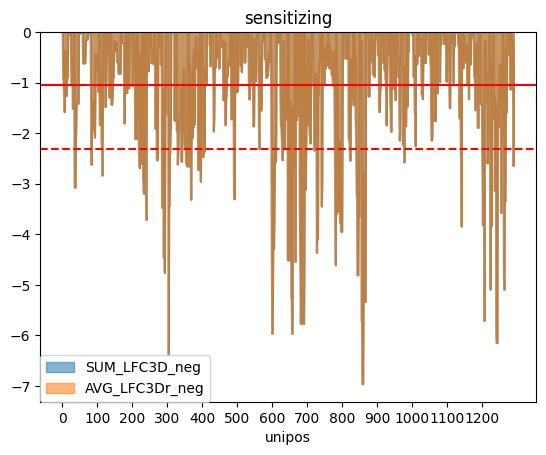

<Figure size 4800x2400 with 0 Axes>

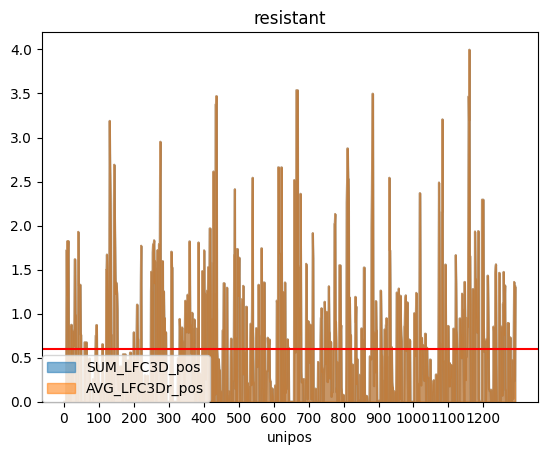

<Figure size 6000x6000 with 0 Axes>

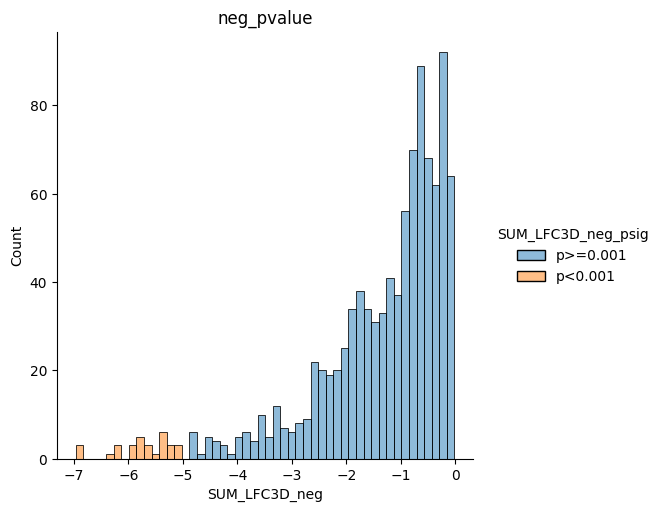

<Figure size 6000x6000 with 0 Axes>

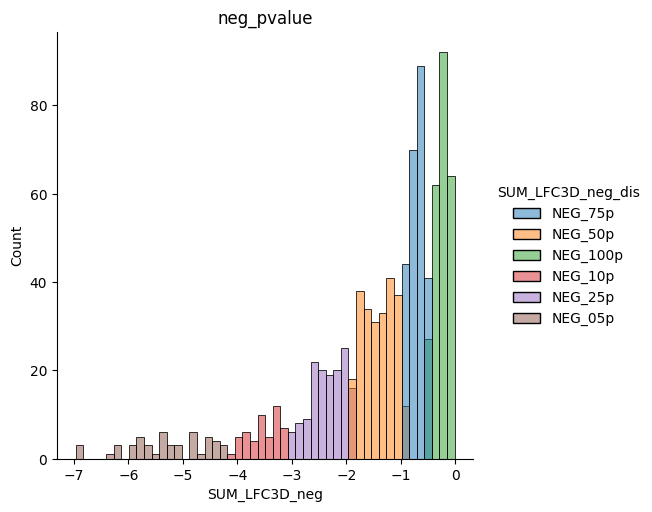

<Figure size 6000x6000 with 0 Axes>

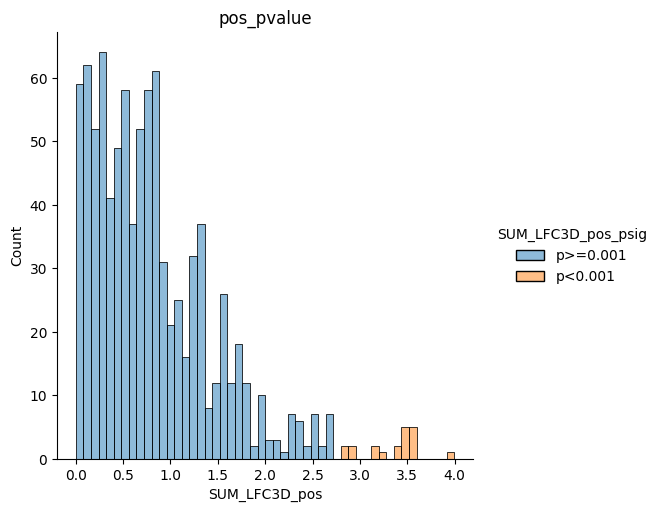

<Figure size 6000x6000 with 0 Axes>

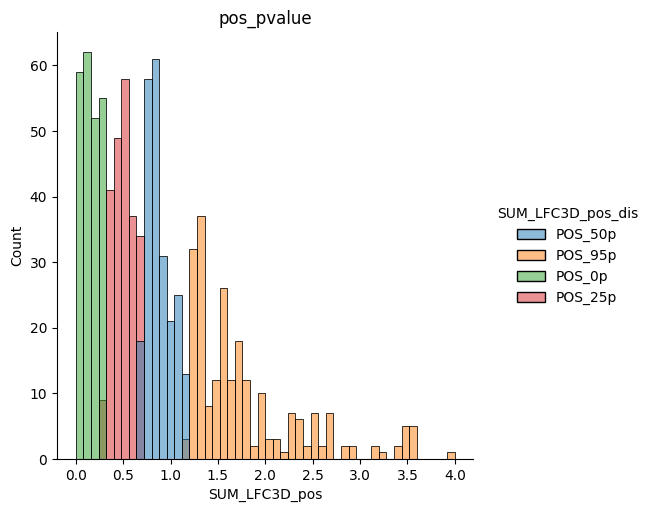

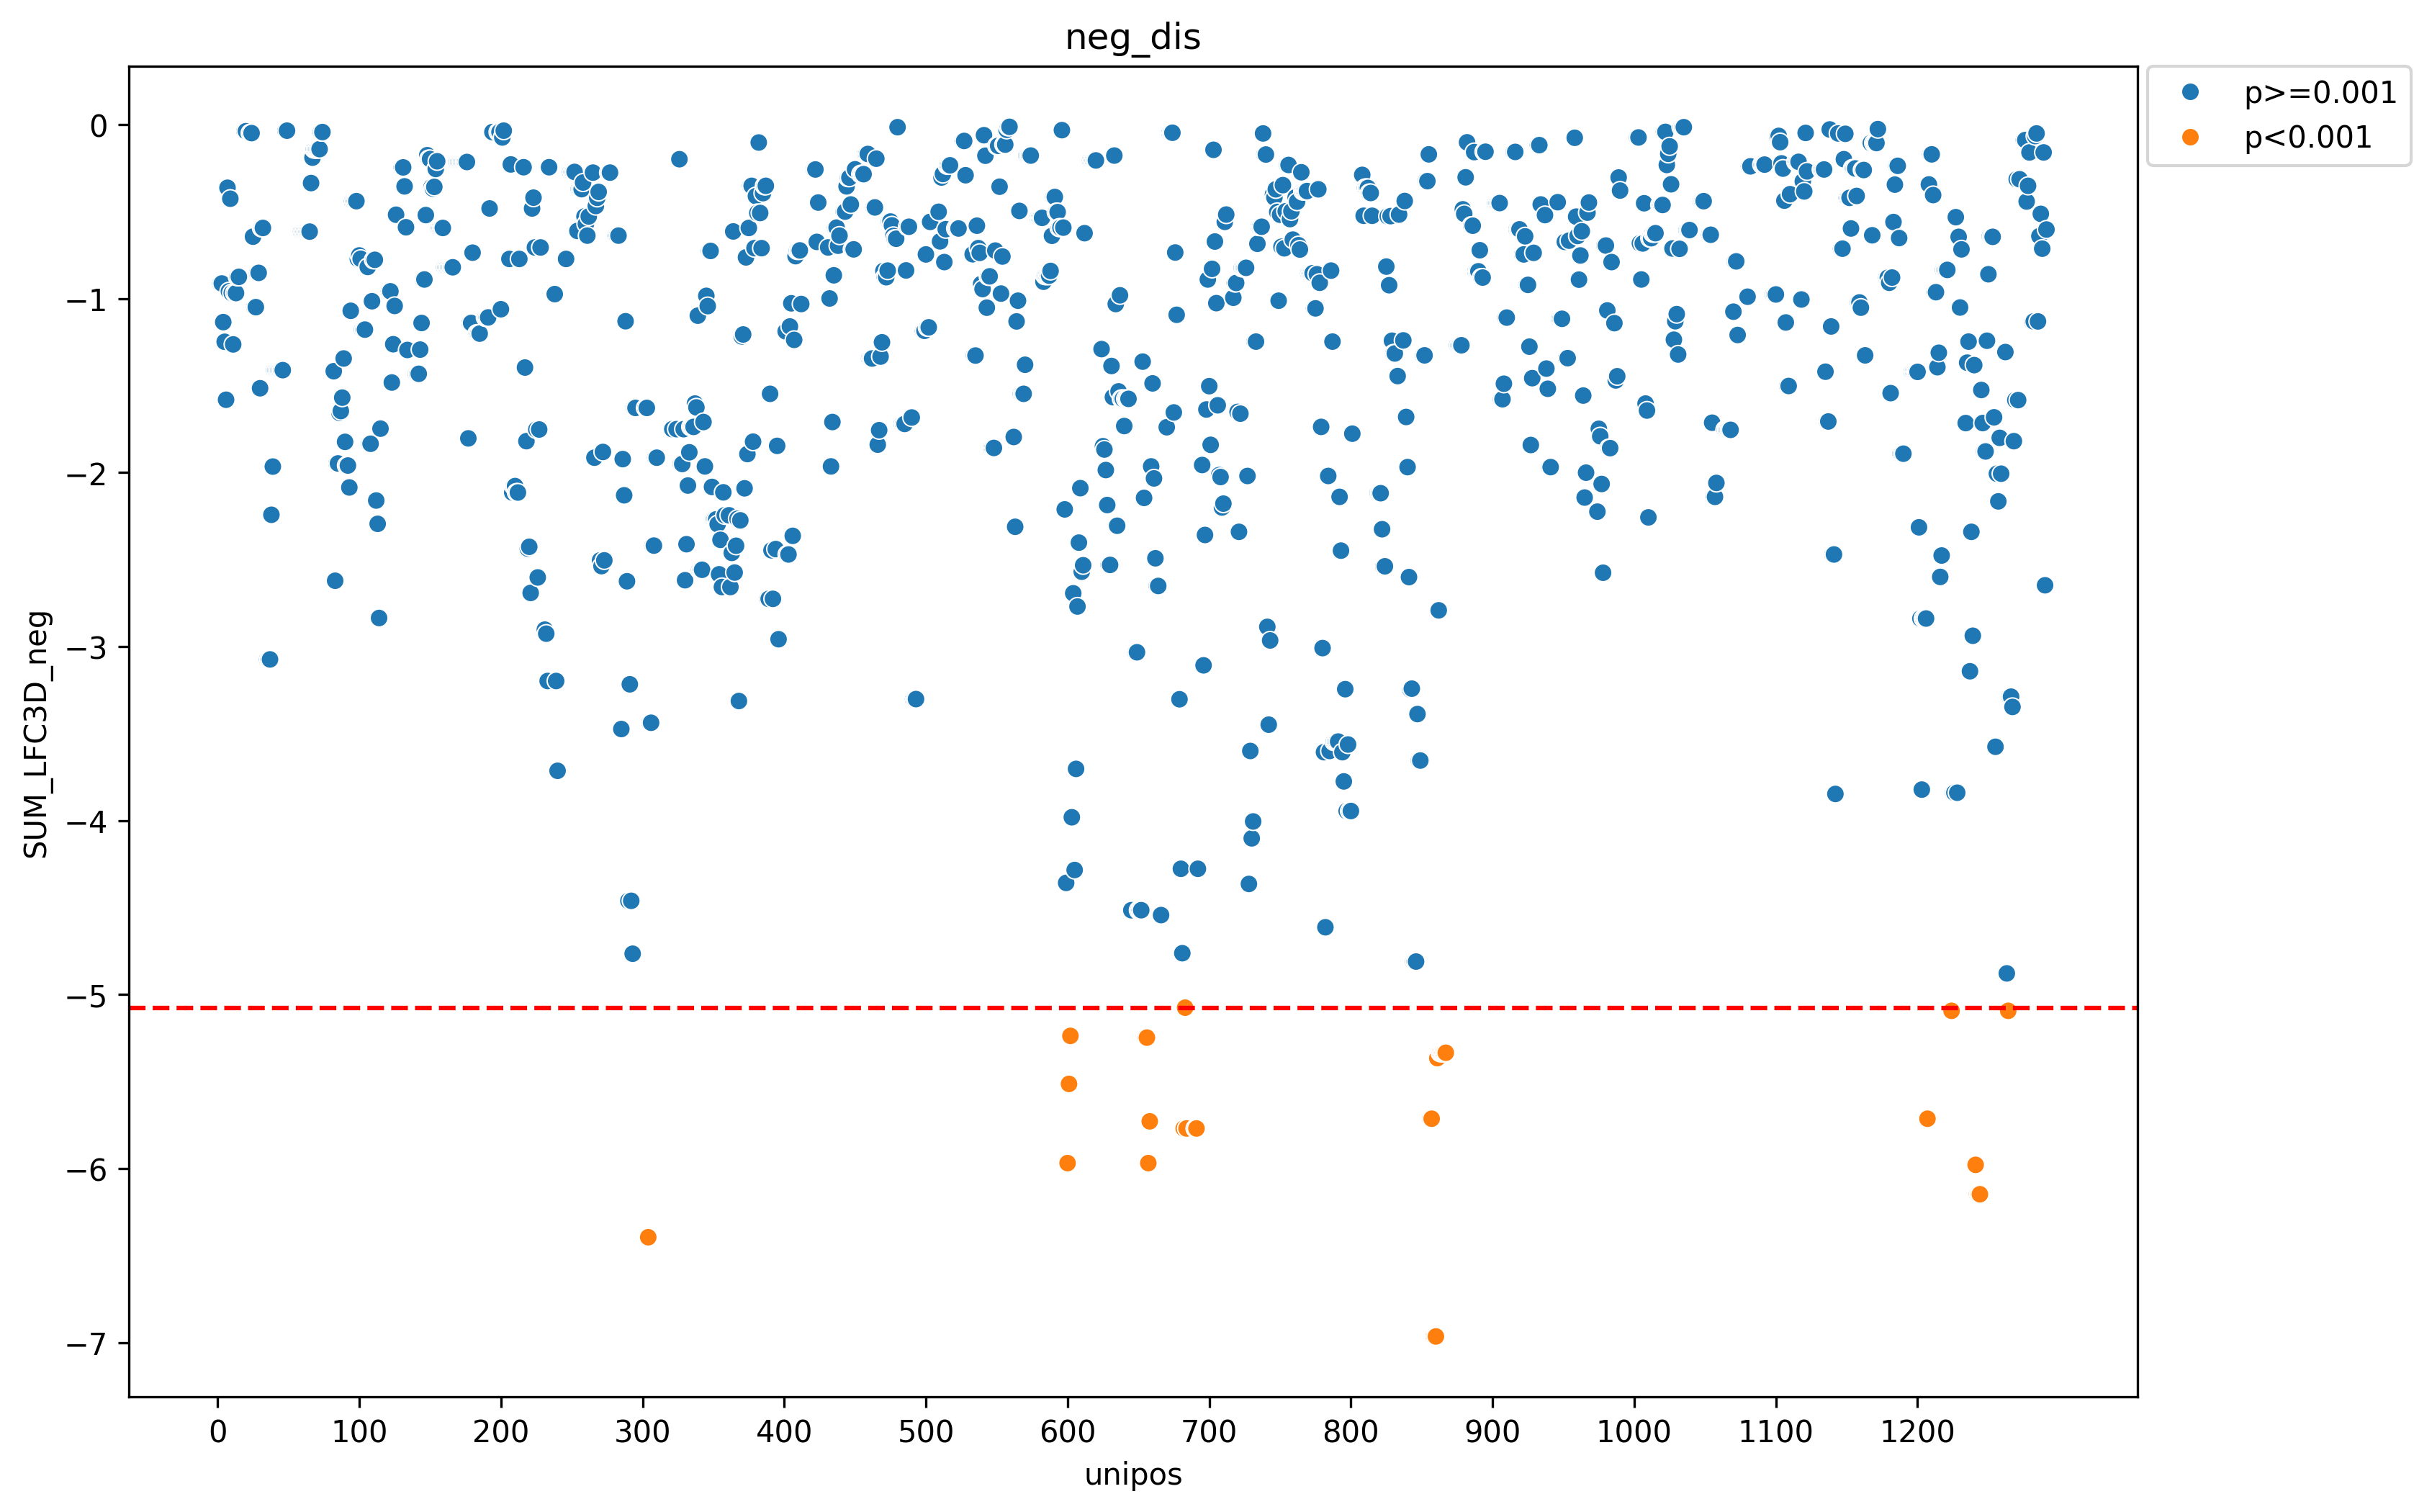

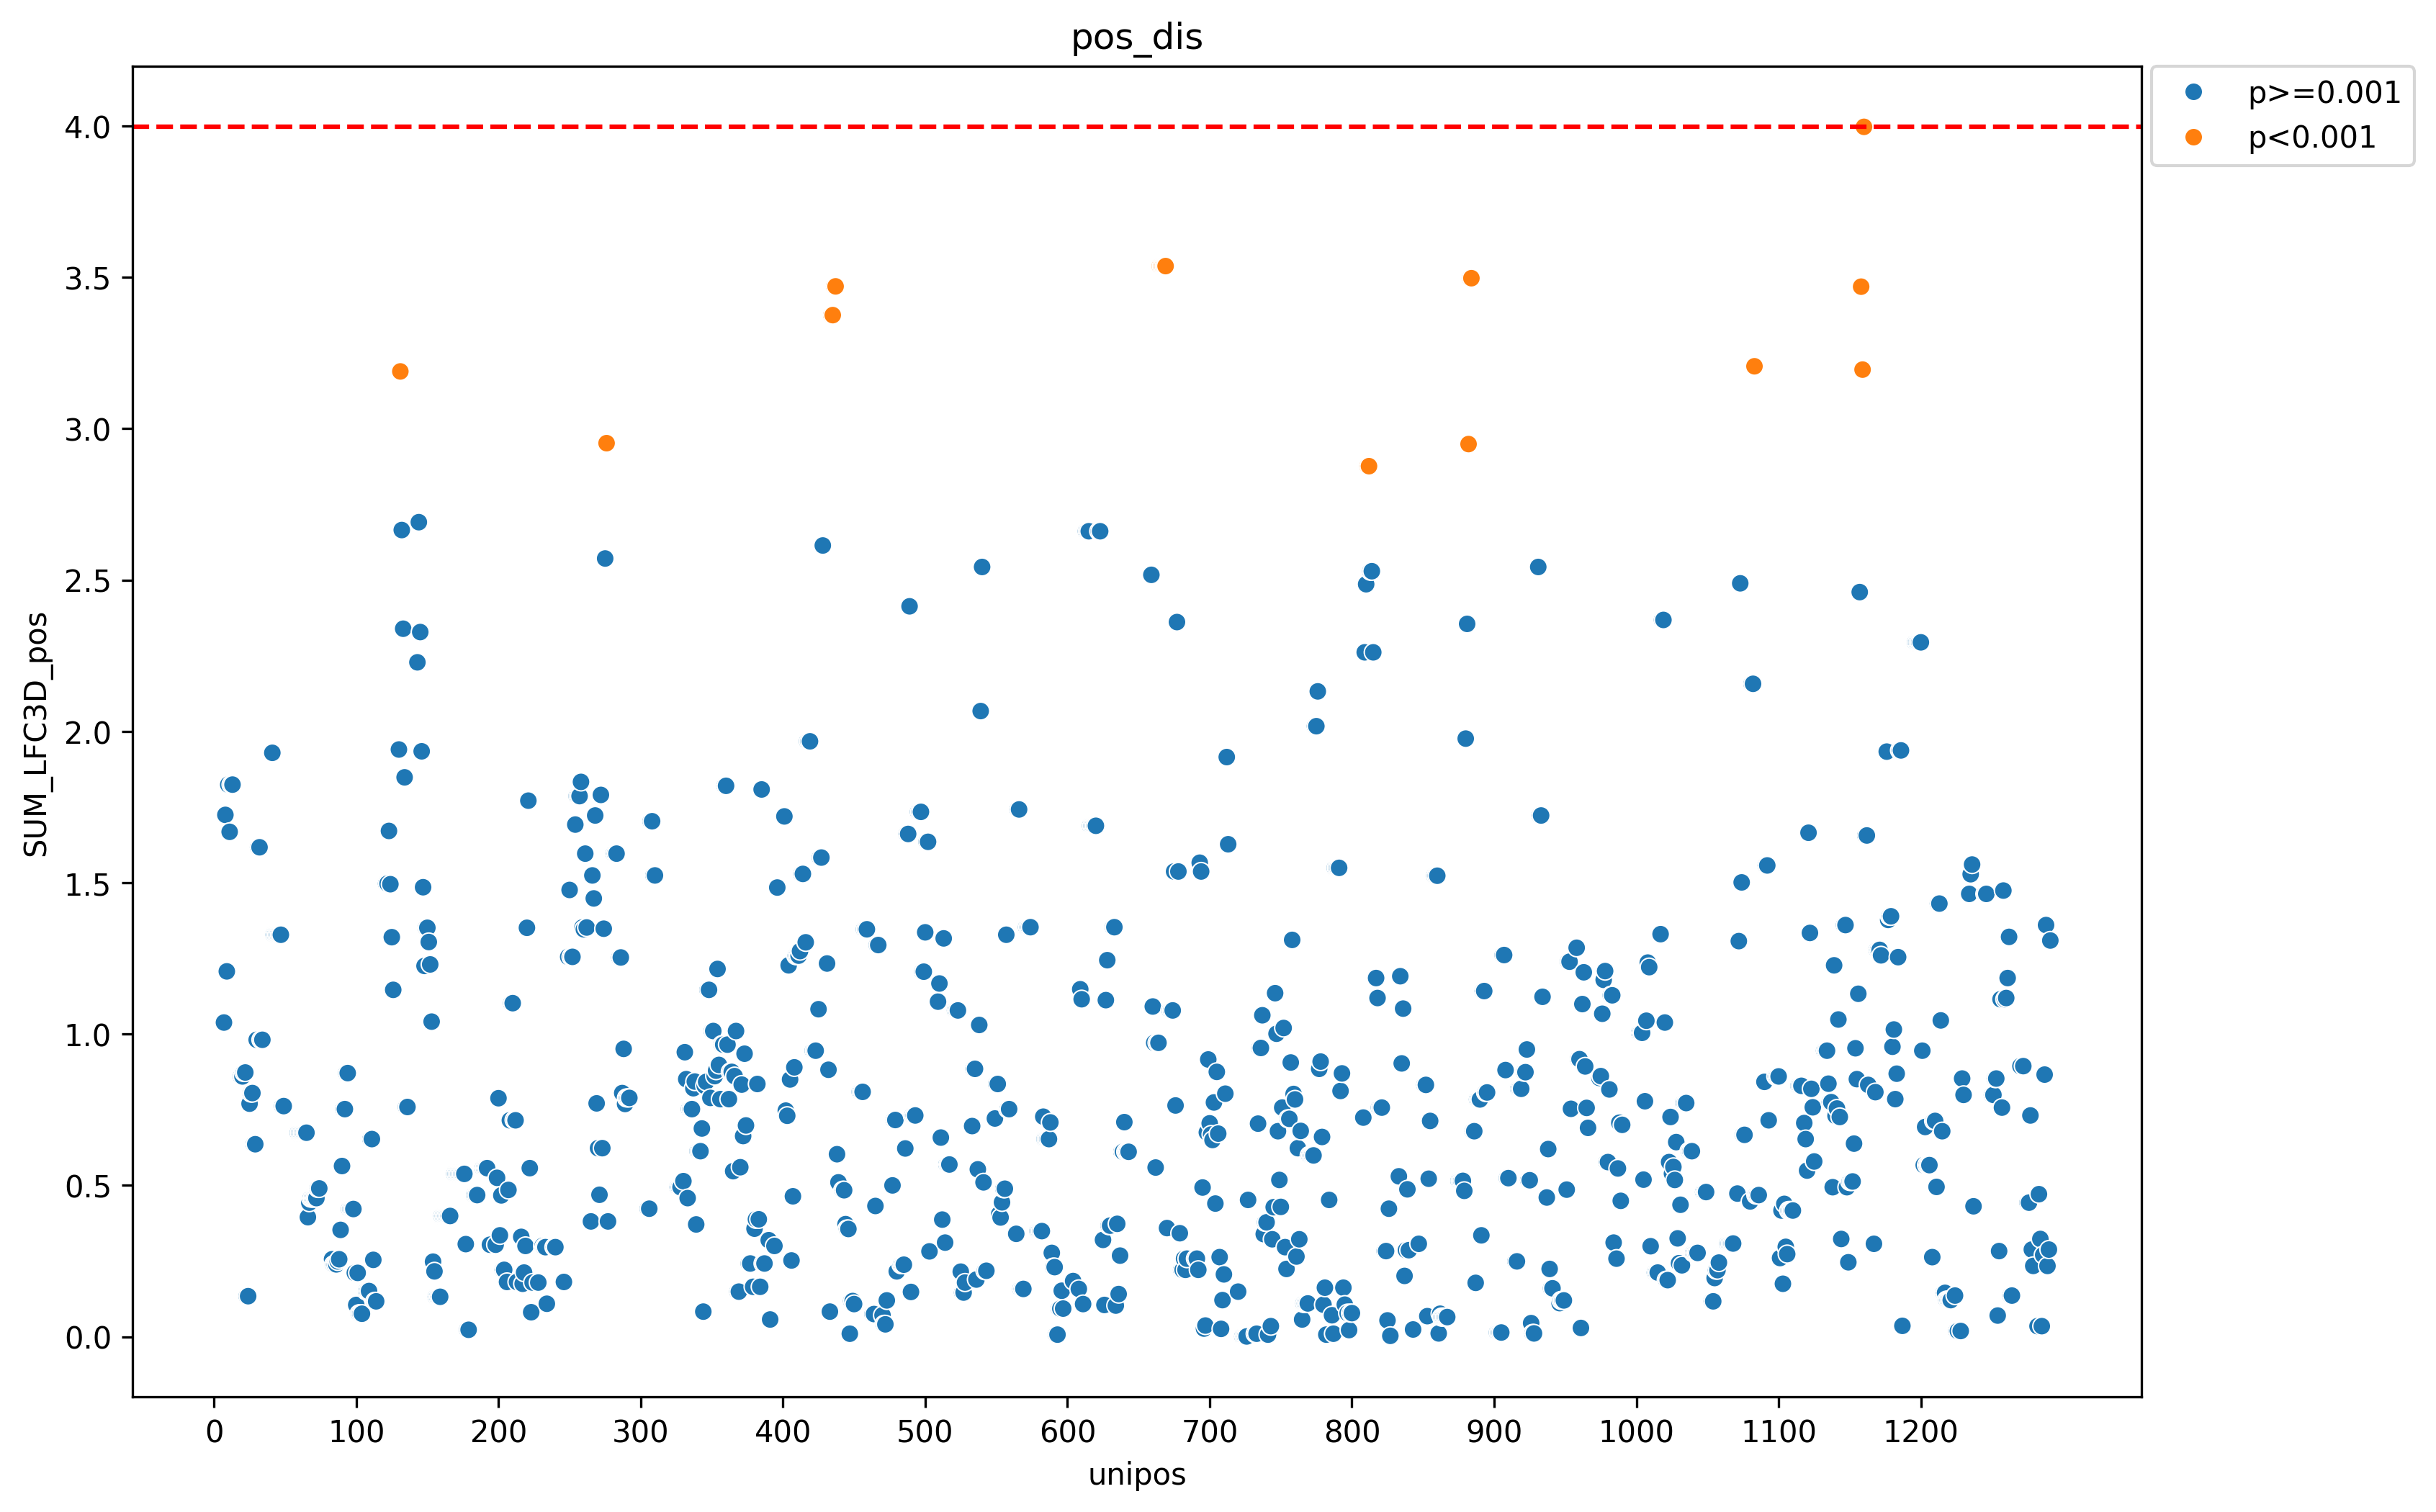

In [29]:
screen1 = 'Human_InVitro_294T_Apobec_D14_Input'
df_LFC_LFC3D = pd.read_csv(f'../tests/results/SETDB1/LFC3D/SETDB1_LFC_LFC3D_per_Random_LFC3Dr.tsv', sep='\t')

metaaggregation(df_LFC_LFC3D, 
                workdir=workdir, 
                input_gene=input_gene, 
                structureid=structureid, 
                input_screens=screens)


## annotate_spatial_clusters.py (5)

In [4]:
from annotate_spatial_clusters import clustering, clustering_distance

Number of clusters of sensitizing hits: @ d =  1.0 31
Number of clusters of sensitizing hits: @ d =  2.0 31
Number of clusters of sensitizing hits: @ d =  3.0 31
Number of clusters of sensitizing hits: @ d =  4.0 11
Number of clusters of sensitizing hits: @ d =  5.0 9
Number of clusters of sensitizing hits: @ d =  6.0 6
Number of clusters of sensitizing hits: @ d =  7.0 5
Number of clusters of sensitizing hits: @ d =  8.0 5
Number of clusters of sensitizing hits: @ d =  9.0 5
Number of clusters of sensitizing hits: @ d =  10.0 5
Number of clusters of sensitizing hits: @ d =  11.0 5
Number of clusters of sensitizing hits: @ d =  12.0 5
Number of clusters of sensitizing hits: @ d =  13.0 5
Number of clusters of sensitizing hits: @ d =  14.0 5
Number of clusters of sensitizing hits: @ d =  15.0 4
Number of clusters of sensitizing hits: @ d =  16.0 4
Number of clusters of sensitizing hits: @ d =  17.0 3
Number of clusters of sensitizing hits: @ d =  18.0 3
Number of clusters of sensitizing

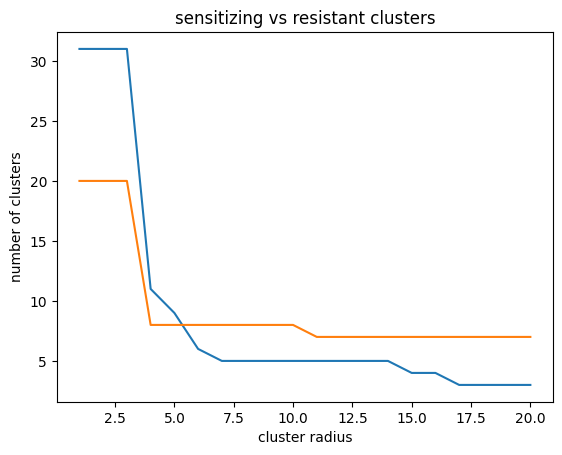

In [5]:
df_str_cons = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")
df_META = pd.read_csv(f"{workdir}/{input_gene}/metaaggregation/{structureid}_MetaAggr_LFC3D_and_randomized_background.tsv", sep = "\t")

dists, arrs = clustering(
    df_str_cons, 
    df_META, 
    workdir=workdir, 
    input_gene=input_gene, 
    structureid=structureid, )

Number of clusters of sensitizing hits: 6


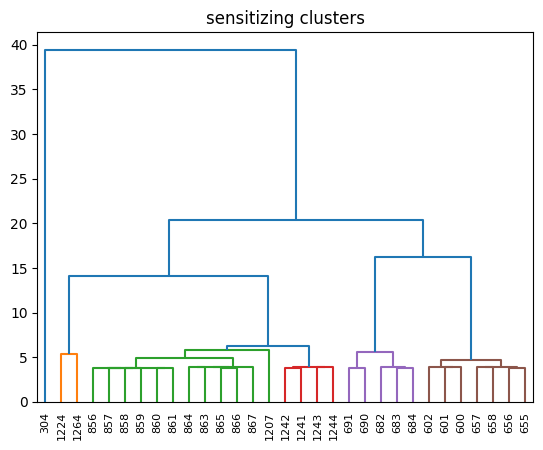

3.0 : 1 : 304 - 304
2.0 : 7 : 600 - 658
1.0 : 5 : 682 - 691
0.0 : 12 : 856 - 1207
4.0 : 2 : 1224 - 1264
5.0 : 4 : 1241 - 1244
Number of clusters of resistant hits: 8


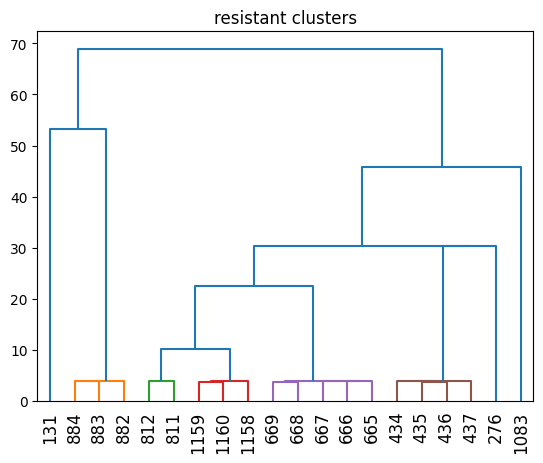

5.0 : 1 : 131 - 131
4.0 : 1 : 276 - 276
6.0 : 4 : 434 - 437
0.0 : 5 : 665 - 669
1.0 : 2 : 811 - 812
3.0 : 3 : 882 - 884
7.0 : 1 : 1083 - 1083
2.0 : 3 : 1158 - 1160


array([5., 4., 6., 0., 1., 3., 7., 2.])

In [7]:
clust_dist = 6.0
clustering_distance(
    df_struc_consvr=df_str_cons, 
    df_META=df_META, 
    thr_distance=clust_dist, 
    workdir=workdir, 
    input_gene=input_gene, 
    input_uniprot=input_uniprot, 
    structureid=structureid, )
